## STAT3612: Statistical Machine Learning

### Assignment 3: Tree-based Methods, PCA, KNN and SVM

### DUE: Dec 01, 2024, Sunday, 11:59 PM


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [75]:
df = pd.read_csv("./heart.csv")

In [76]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [77]:
df["newSex"] = df["Sex"].map({"M": 1, "F": 0})
df["newChestPainType"] = df["ChestPainType"].map(
    {"ASY": 3, "NAP": 2, "ATA": 1, "TA": 0}
)
df["newRestingECG"] = df["RestingECG"].map({"LVH": 2, "ST": 1, "Normal": 0})
df["newExerciseAngina"] = df["ExerciseAngina"].map({"Y": 1, "N": 0})
df["newST_Slope"] = df["ST_Slope"].map({"Down": 2, "Up": 1, "Flat": 0})
df.drop("Sex", axis=1, inplace=True)
df.drop("ChestPainType", axis=1, inplace=True)
df.drop("RestingECG", axis=1, inplace=True)
df.drop("ExerciseAngina", axis=1, inplace=True)
df.drop("ST_Slope", axis=1, inplace=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,newSex,newChestPainType,newRestingECG,newExerciseAngina,newST_Slope
0,40,140,289,0,172,0.0,0,1,1,0,0,1
1,49,160,180,0,156,1.0,1,0,2,0,0,0
2,37,130,283,0,98,0.0,0,1,1,1,0,1
3,48,138,214,0,108,1.5,1,0,3,0,1,0
4,54,150,195,0,122,0.0,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,0,0
914,68,144,193,1,141,3.4,1,1,3,0,0,0
915,57,130,131,0,115,1.2,1,1,3,0,1,0
916,57,130,236,0,174,0.0,1,0,1,2,0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   newSex             918 non-null    int64  
 8   newChestPainType   918 non-null    int64  
 9   newRestingECG      918 non-null    int64  
 10  newExerciseAngina  918 non-null    int64  
 11  newST_Slope        918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [79]:
X = df.drop("HeartDisease", axis=1)
Y = df["HeartDisease"]

In [80]:
X.columns.to_list()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'newSex',
 'newChestPainType',
 'newRestingECG',
 'newExerciseAngina',
 'newST_Slope']

#### Part 1: Tree-based Methods


In [81]:
# Q1 (a)

# ------------------
# Write your code here
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=2024
)

# ------------------

In [82]:
# Q1 (b)

# ------------------
# Write your code here
# Initialize the scaler with feature range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# ------------------

In [83]:
# Q1 (c)

# ------------------
# Write your code here
# Initialize the Decision Tree with max_depth=3 and entropy criterion
dt_model = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=2024)

# Fit the model on the scaled training data
dt_model.fit(X_train_scaled, y_train)

# ------------------

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2024)

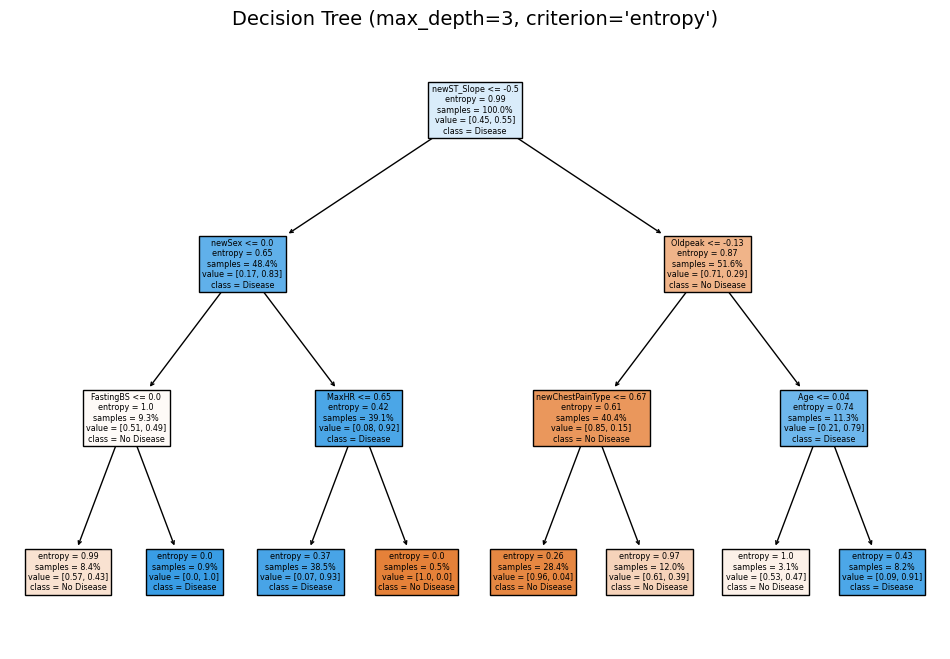

In [84]:
# Q1 (d)

# ------------------
# Write your code here
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model,
    feature_names=X.columns.tolist(),
    class_names=["No Disease", "Disease"],
    filled=True,
    proportion=True,
    precision=2,
)
plt.title("Decision Tree (max_depth=3, criterion='entropy')", fontsize=14)
plt.show()

# ------------------

In [85]:
# Predictions
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8545
Testing Accuracy: 0.8043


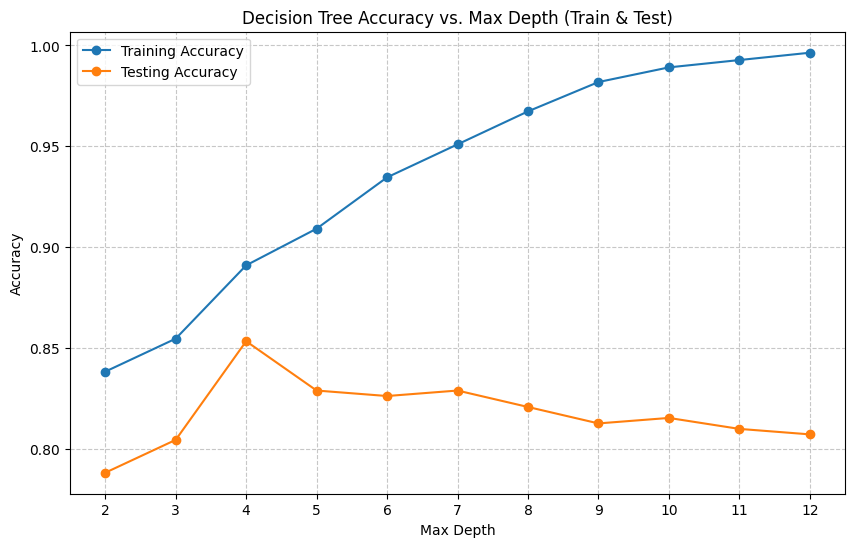

In [86]:
# Q2 (a)

# ------------------
# Write your code here
# Define range of max_depth values
max_depths = range(2, 13)

# Store accuracy scores
dt_train_scores = []
dt_test_scores = []

for depth in max_depths:
    # Initialize and fit the model
    dt = DecisionTreeClassifier(max_depth=depth, criterion="entropy", random_state=2024)
    dt.fit(X_train_scaled, y_train)

    # Predict on train and test sets
    y_train_pred = dt.predict(X_train_scaled)
    y_test_pred = dt.predict(X_test_scaled)

    # Compute accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    dt_train_scores.append(train_accuracy)
    dt_test_scores.append(test_accuracy)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, dt_train_scores, "o-", label="Training Accuracy")
plt.plot(max_depths, dt_test_scores, "o-", label="Testing Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Max Depth (Train & Test)")
plt.xticks(max_depths)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()
# ------------------

In [87]:
max_dt_test_score = max(dt_test_scores)
index_dt_max_test_score = dt_test_scores.index(max_dt_test_score)
print(index_dt_max_test_score + 2, round(max_dt_test_score, 4))

4 0.8533


Test score is the maximum when `max_depth` is 4, with an accuracy of 0.853

No, we should not continue increasing depth beyond the point where test accuracy starts declining. This would cause the tree to have higher variance as it starts to memorise the noise in the train set. This explains the divergence of in test scores and train scores as `max_depth` increases beyong 4.


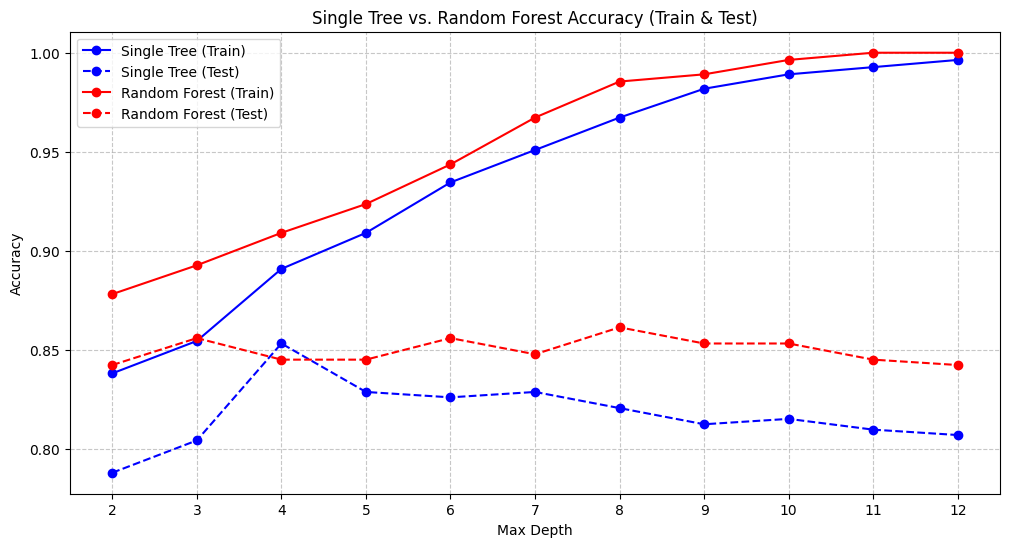

In [88]:
# Q2 (b)

# ------------------
# Write your code here
# Initialize lists to store scores
rf_train_scores = []
rf_test_scores = []

for depth in max_depths:
    # --- Random Forest ---
    rf = RandomForestClassifier(
        n_estimators=80, max_depth=depth, max_features=4, random_state=2024
    )
    rf.fit(X_train_scaled, y_train)
    rf_train_scores.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
    rf_test_scores.append(accuracy_score(y_test, rf.predict(X_test_scaled)))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(max_depths, dt_train_scores, "o-", color="blue", label="Single Tree (Train)")
plt.plot(max_depths, dt_test_scores, "o--", color="blue", label="Single Tree (Test)")
plt.plot(max_depths, rf_train_scores, "o-", color="red", label="Random Forest (Train)")
plt.plot(max_depths, rf_test_scores, "o--", color="red", label="Random Forest (Test)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Single Tree vs. Random Forest Accuracy (Train & Test)")
plt.xticks(max_depths)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# ------------------

In [89]:
max_rf_test_score = max(rf_test_scores)
index_rf_max_test_score = rf_test_scores.index(max_rf_test_score)
print(index_rf_max_test_score + 2, round(max_rf_test_score, 4))

8 0.8614


RF Test score is the maximum when `max_depth` is 8, with an accuracy of 0.861

No, we should not continue increasing depth beyond the point where test accuracy starts declining. Beyond `max_depth`=8, the test accurcy starts to decrease, suggesting that the RF classifier model is overfitting to the data.


#### Part 3: PCA and K-Nearest Neighbors


In [90]:
# Q3 (a)

# ------------------
# Write your code here
# Fit kNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy: {test_accuracy:.4f}")

# ------------------

KNN Test Accuracy: 0.8478


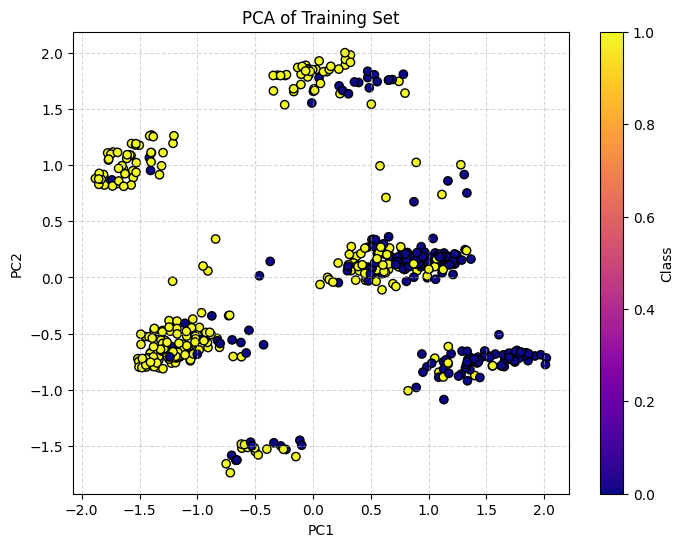

In [91]:
# Q3 (b)

# ------------------
# Write your code here
# Initialize PCA
pca = PCA(n_components=2)

# Fit on training data and transform both sets
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a scatter plot for the training set
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,        
    cmap='plasma',
    edgecolor='k'
)

# Add labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Training Set')
plt.colorbar(scatter, label='Class')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ------------------

In [92]:
# Q3 (c)

# ------------------
# Write your code here
# Fit on PCA-transformed training data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)

# Predict on PCA-transformed test data
y_pred_pca = knn_pca.predict(X_test_pca)

# Calculate accuracy
test_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"KNN Test Accuracy (PCA-reduced data): {test_accuracy_pca:.4f}")

# ------------------

KNN Test Accuracy (PCA-reduced data): 0.8152


The PCA-reduced accuracy (0.8152) is close to the original KNN accuracy (0.8478), suggesting that PCA retains most of the discriminative information. The plot in 3(b) shows that there is somewhat distinct class separation, suggesting that kNN classifier on the pre-tranformed data should perform relatively well. Additionally, it is expected that the PCA-reduced data will perform sufficiently well too.

#### Part 4: Support Vector Machine


In [93]:
# Q4 (a)

# ------------------
# Write your code here
X_q4 = df[['Age', 'RestingBP']]
X_train_q4, X_test_q4, y_train_q4, y_test_q4 = train_test_split(X_q4, Y, test_size=0.3, random_state=2024)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_q4_scaled = scaler.fit_transform(X_train_q4)
X_test_q4_scaled = scaler.transform(X_test_q4)

# ------------------

In [94]:
# Q4 (b)

# ------------------
# Write your code here
svm = SVC(C=1.5, kernel='rbf', random_state=2024)
svm.fit(X_train_q4_scaled, y_train_q4)

# ------------------

SVC(C=1.5, random_state=2024)

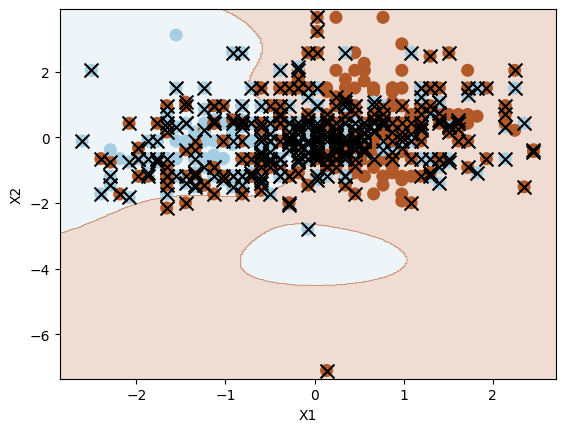

Number of support vectors:  484


In [95]:
# Q4 (c)

# ------------------
import matplotlib as mpl


def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c="k", marker="x", s=100)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    print("Number of support vectors: ", svc.support_.size)


# Write your code here
plot_svc(svm, X_train_q4_scaled, y_train_q4)

# ------------------

Test Accuracy: 0.5906


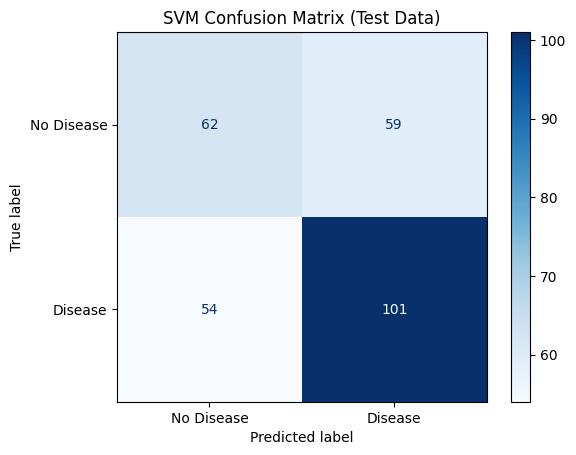

In [96]:
# Q4 (d)

# ------------------
# Write your code here
# Predict on test set
y_pred_q4 = svm.predict(X_test_q4_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_q4, y_pred_q4)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test_q4, y_pred_q4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=['No Disease', 'Disease'])

# Plot matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM Confusion Matrix (Test Data)')
plt.grid(False)
plt.show()

# ------------------